In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def w(u, v, x, y, T):
    cu = 1 if u != 0 else 1/np.sqrt(2)
    cv = 1 if v != 0 else 1/np.sqrt(2)
    theta = np.pi / (2*T)
    return cu * cv * np.cos((2*x+1)*u*theta) * np.cos((2*y+1)*v*theta)

In [3]:
def dct(img, width=8):
    H, W, ch = img.shape
    F = np.zeros(img.shape, dtype=np.float32)
    for c in range(ch):
        for sx in range(0, H, width):
            for sy in range(0, W, width):
                for i in range(width):
                    for j in range(width):
                        for x in range(width):
                            for y in range(width):
                                F[sx+i, sy+j, c] += 2/width * img[sx+x, sy+y, c] * w(i, j, x, y, width)
    return F

In [4]:
def idct(F, width=8, K=8):
    H, W, ch = F.shape
    f = np.zeros(img.shape, dtype=np.float32)
    for c in range(ch):
        for sx in range(0, H, width):
            for sy in range(0, W, width):
                for x in range(width):
                    for y in range(width):
                        for i in range(K):
                            for j in range(K):
                                f[sx+x, sy+y, c] += 2/width * F[sx+i, sy+j, c] * w(i, j, x, y, width)
    f = np.clip(f, 0, 255).astype("uint8")
    return f

In [5]:
Q = np.array(((16, 11, 10, 16, 24, 40, 51, 61),
              (12, 12, 14, 19, 26, 58, 60, 55),
              (14, 13, 16, 24, 40, 57, 69, 56),
              (14, 17, 22, 29, 51, 87, 80, 62),
              (18, 22, 37, 56, 68, 109, 103, 77),
              (24, 35, 55, 64, 81, 104, 113, 92),
              (49, 64, 78, 87, 103, 121, 120, 101),
              (72, 92, 95, 98, 112, 100, 103, 99)), dtype=np.float32)

def quantize(F, width=8):
    H, W, ch = F.shape
    
    R = np.zeros(F.shape)
    for c in range(ch):
        for sx in range(0, H, width):
            for sy in range(0, W, width):
                for x in range(width):
                    for y in range(width):
                        R[sx+x, sy+y, c] = np.round(F[sx+x, sy+y, c] / Q[x][y])
                        
    return R

def restore(R, width=8):
    H, W, ch = R.shape
    
    F = np.zeros(R.shape)
    for c in range(ch):
        for sx in range(0, H, width):
            for sy in range(0, W, width):
                for x in range(width):
                    for y in range(width):
                        F[sx+x, sy+y, c] = R[sx+x, sy+y, c] * Q[x][y]
    
    return F

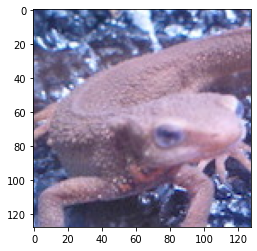

In [6]:
img = cv2.imread("../imori.jpg")
H, W, ch = img.shape
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

F = dct(img)

In [7]:
R = quantize(F)
F2 = restore(R)

In [8]:
K = 4
output_img = idct(F2, width=8, K=K).astype("uint8")

In [10]:
def PSNR(img_1, img_2):
    H, W, ch = img_1.shape
    v_max = 255
    MSE = np.sum((img_1 - img_2)**2) / (H*W*ch)
    return 10 * np.log10((v_max**2) / MSE)

def bitrate(width=8, K=8):
    return width * (K**2) / (width**2)

PSNR = 31.10515696105052
Bitrate =  2.0


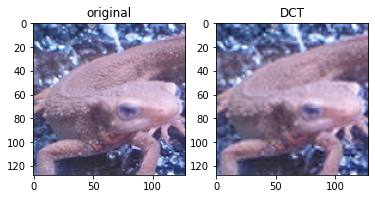

True

In [12]:
print("PSNR =", PSNR(img, output_img))
print("Bitrate = ", bitrate(8, K))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("original")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.title("DCT")
plt.show()

cv2.imwrite("out_038.jpg", output_img)